In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('Program_1_Dataset.csv')
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [3]:
print (df.columns)

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms ', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')
Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms ', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')


In [4]:
df.rename(columns = {'Avg_rooms ':'Avg_rooms'}, inplace = True)

In [5]:
print (df.columns)

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')
Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')


In [6]:
# 2. Calculate the Variance Inflation Factor for each of the selected predictors. Based on the VIF 
# factor, finalize the list of predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
# Defining the target and predictor variables
predictors = ['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']

# Create a DataFrame with only the predictors
X = df[predictors]    # Predictor
y = df['MValue']      # Target

In [9]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = predictors
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif_data)

           Variable        VIF
0         Avg_rooms  16.747965
1          Distance   6.880607
2  Property_TaxRate  13.861510
3  Non_Retail_Acres   9.598374
           Variable        VIF
0         Avg_rooms  16.747965
1          Distance   6.880607
2  Property_TaxRate  13.861510
3  Non_Retail_Acres   9.598374


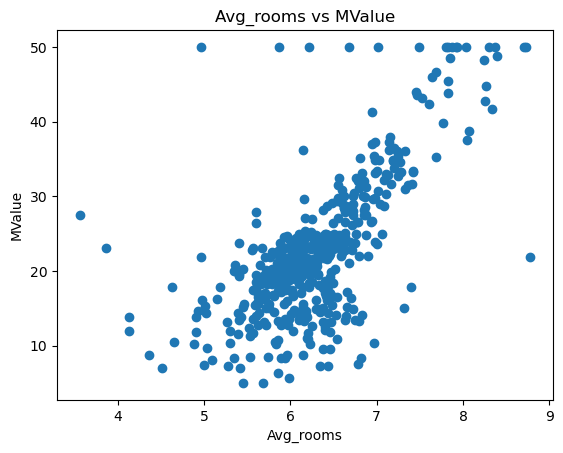

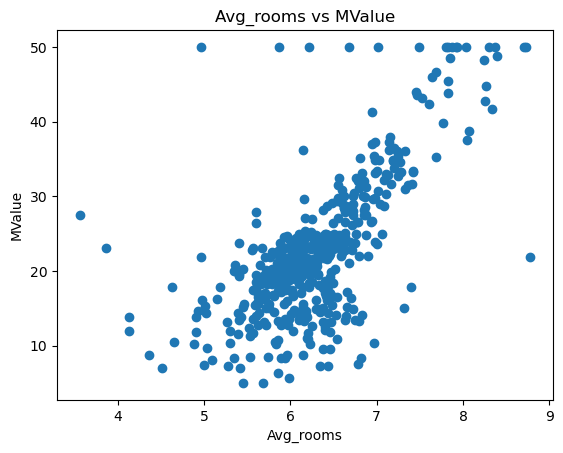

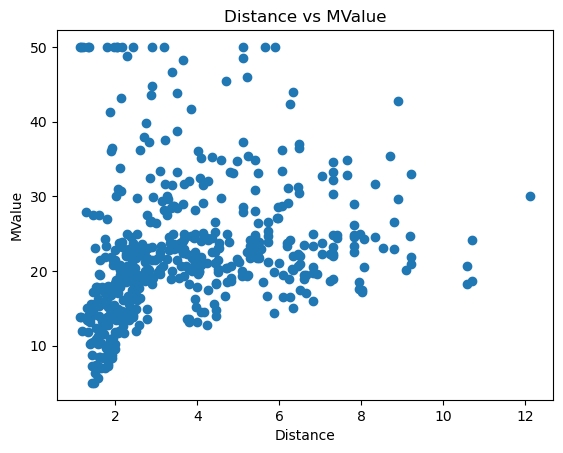

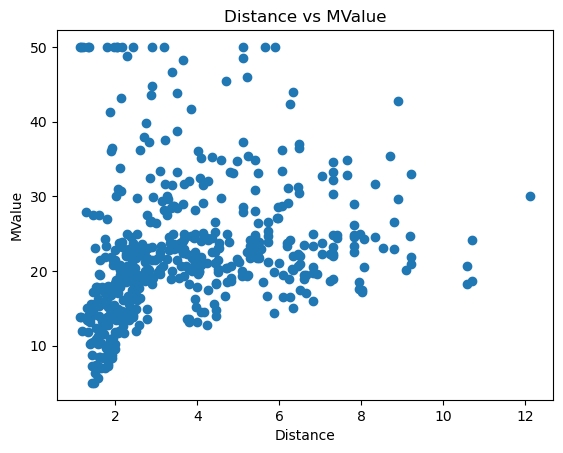

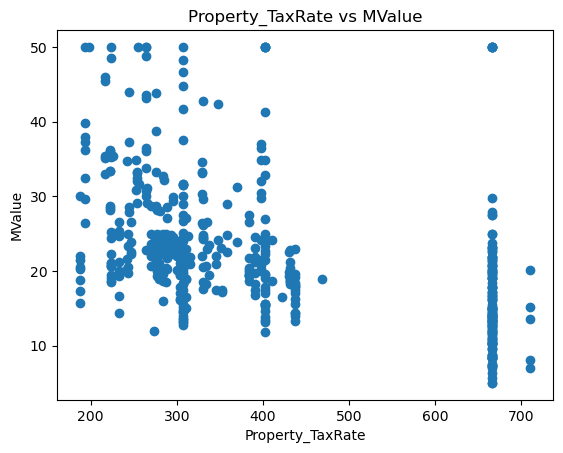

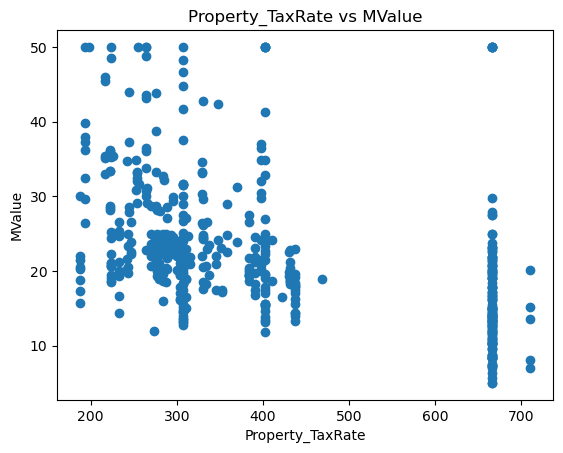

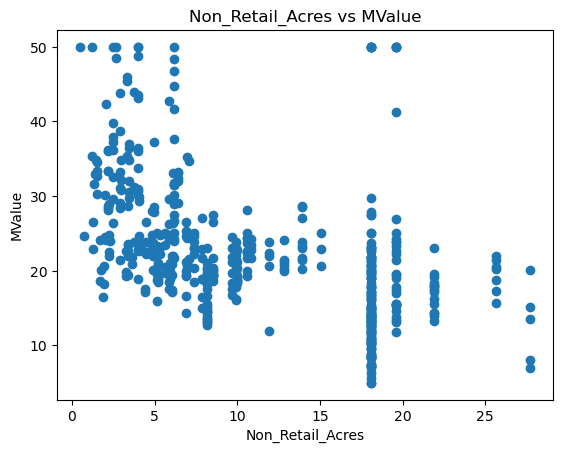

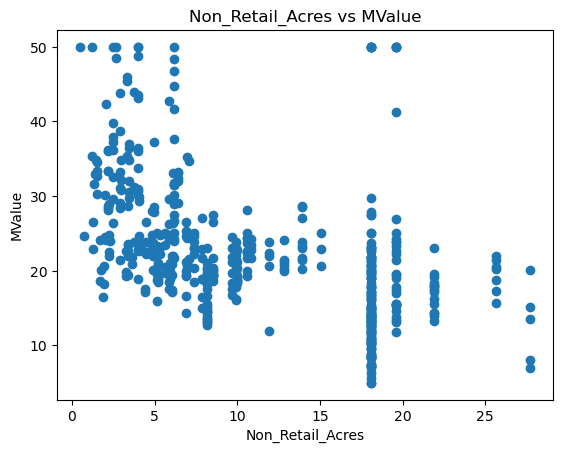

In [10]:
# Visualizing association with the target using scatter plots
for predictor in predictors:
    plt.scatter(df[predictor], df['MValue'])
    plt.title(f'{predictor} vs MValue')
    plt.xlabel(predictor)
    plt.ylabel('MValue')
    plt.show()

In [11]:
# 4: Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, df['MValue'], test_size=0.33, random_state=42)


In [12]:
# 5: Build a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

LinearRegression()

In [13]:
# 6: Observe coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [ 7.71823295 -0.65291673 -0.01373718 -0.21258162]
Intercept: -15.332210810746524
Coefficients: [ 7.71823295 -0.65291673 -0.01373718 -0.21258162]
Intercept: -15.332210810746524


In [14]:
# 7: Evaluate the model
# Train set
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

# Test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1 - r2_test) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"Mean Squared Error (Train): {mse_train}")
print(f"R-squared (Train): {r2_train}")
print(f"Adjusted R-squared (Train): {adj_r2_train}")

print(f"Mean Squared Error (Test): {mse_test}")
print(f"R-squared (Test): {r2_test}")
print(f"Adjusted R-squared (Test): {adj_r2_test}")

Mean Squared Error (Train): 40.83615624350907
R-squared (Train): 0.552374742371587
Adjusted R-squared (Train): 0.547013960843103
Mean Squared Error (Test): 27.569771797553905
R-squared (Test): 0.60781481718806
Adjusted R-squared (Test): 0.5981312324272714
Mean Squared Error (Train): 40.83615624350907
R-squared (Train): 0.552374742371587
Adjusted R-squared (Train): 0.547013960843103
Mean Squared Error (Test): 27.569771797553905
R-squared (Test): 0.60781481718806
Adjusted R-squared (Test): 0.5981312324272714


### 7. Provide suitable inferences on the model

###### Mean Squared Error (MSE):
- The MSE on the training set is 40.84, and on the test set is 27.57.
- The lower the MSE, the better the model performance. The lower MSE on the test set suggests that the model is generalizing well to new, unseen data.

###### R-squared (R²):
- The R² on the training set is 0.55, and on the test set is 0.61.
- The R² values suggest that the model explains approximately 55% of the variance in the training data and 61% in the test data. While the model is capturing a significant portion of the variability, there is still room for improvement.

###### Adjusted R-squared:
 - The adjusted R² on the training set is 0.55, and on the test set is 0.60.
 - The adjusted R² values are slightly lower than the R² values, indicating that the inclusion of predictors may not be significantly improving the model's performance.

#### Overall Analysis
- The model appears to have moderate predictive power, explaining a reasonable amount of variance in the target variable.
- The model generalizes well to the test data, as indicated by the comparable performance on the training and test sets.
